In [1]:
import pandas as pd
import numpy as nm
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\Sagnik\Desktop\H2H VERY IMPORTANT\H2HBABBA2721.csv')
df.shape                                        # reading the dataset

(50000, 19)

In [3]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0100047527,LIDL corporation,NaN,2020.0,1.930676e+09,2020-03-25,20200320,20200325,20200409.0,USD,RV,1.0,NaN,9313.16,20200325.0,NAA8,1.930676e+09,1
1,U001,0200771157,WEIS corporation,2019-03-18 00:00:00,2019.0,1.928886e+09,2019-03-03,20190302,20190303,20190318.0,USD,RV,1.0,NaN,36826.30,20190303.0,NAA8,1.928886e+09,0
2,CA02,0140105686,SYSC associates,2019-07-11 00:00:00,2019.0,2.960557e+09,2019-06-25,20190625,20190625,20190706.0,CAD,RV,1.0,NaN,10317.76,20190626.0,CA10,2.960557e+09,0
3,U001,0200769623,WAL-MAR associates,2019-03-21 00:00:00,2019.0,1.928901e+09,2019-03-05,20190305,20190305,20190320.0,USD,RV,1.0,NaN,10093.94,20190305.0,NAH4,1.928901e+09,0
4,U001,0200769623,WAL-MAR in,2019-04-30 00:00:00,2019.0,1.929135e+09,2019-04-14,20190411,20190414,20190429.0,USD,RV,1.0,NaN,16842.75,20190414.0,NAH4,1.929135e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0100031704,DELHAIZE co,NaN,2020.0,1.930776e+09,2020-04-10,20200410,20200410,20200425.0,USD,RV,1.0,NaN,93511.23,20200410.0,NAA8,1.930776e+09,1
49996,U001,0200797452,US corporation,2019-06-21 00:00:00,2019.0,1.929427e+09,2019-06-04,20190604,20190604,20190619.0,USD,RV,1.0,NaN,63562.60,20190604.0,NAA8,1.929427e+09,0
49997,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930719e+09,2020-03-30,20200330,20200330,20200414.0,USD,RV,1.0,NaN,43420.88,20200330.0,NAH4,1.930719e+09,1
49998,U001,0200466603,SMITH'S llc,NaN,2020.0,1.930633e+09,2020-03-11,20200310,20200311,20200326.0,USD,RV,1.0,NaN,20798.02,20200311.0,NAA8,1.930633e+09,1


### Pre-Processing

In [4]:
df.loc[df.duplicated(), :]       #displaying duplicate rows

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1250,U001,200455322,PEA foundation,2019-04-08 00:00:00,2019.0,1.928879e+09,2019-03-01,20190228,20190301,20190331.0,USD,RV,1.0,NaN,66519.39,20190301.0,NAD5,1.928879e+09,0
2013,U001,0200148860,DOLLA systems,2019-03-05 00:00:00,2019.0,1.928814e+09,2019-02-18,20190217,20190218,20190305.0,USD,RV,1.0,NaN,101808.49,20190218.0,NAA8,1.928814e+09,0
2052,U001,0200779906,BOZZU us,NaN,2020.0,1.930683e+09,2020-03-23,20200321,20200323,20200407.0,USD,RV,1.0,NaN,2532.57,20200323.0,NAA8,1.930683e+09,1
2837,CA02,0140104429,COSTCO trust,2019-02-11 00:00:00,2019.0,2.960524e+09,2019-01-24,20190124,20190124,20190204.0,CAD,RV,1.0,NaN,19812.45,20190125.0,CA10,2.960524e+09,0
3377,U001,0200705089,JETR,2019-03-19 00:00:00,2019.0,1.928887e+09,2019-03-04,20190302,20190304,20190319.0,USD,RV,1.0,NaN,2724.69,20190304.0,NAA8,1.928887e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49910,U001,0200353024,DECA corp,2019-10-16 00:00:00,2019.0,1.929958e+09,2019-10-03,20191003,20191003,20191024.0,USD,RV,1.0,NaN,1151.14,20191001.0,NAM4,1.929958e+09,0
49921,U001,0200769623,WAL-MAR corporation,2020-02-21 00:00:00,2020.0,1.930501e+09,2020-02-09,20200208,20200209,20200224.0,USD,RV,1.0,NaN,37740.85,20200209.0,NAH4,1.930501e+09,0
49953,CA02,0140104429,COSTCO associates,2019-07-22 00:00:00,2019.0,2.960565e+09,2019-07-15,20190715,20190715,20190727.0,CAD,RV,1.0,NaN,8805.54,20190717.0,CA10,2.960565e+09,0
49985,U001,0200769623,WAL-MAR trust,2019-11-19 00:00:00,2019.0,1.930130e+09,2019-11-09,20191108,20191109,20191124.0,USD,RV,1.0,NaN,53098.06,20191109.0,NAH4,1.930130e+09,0


In [5]:
df = df.drop_duplicates(keep='first') #deletes duplicate rows
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0100047527,LIDL corporation,NaN,2020.0,1.930676e+09,2020-03-25,20200320,20200325,20200409.0,USD,RV,1.0,NaN,9313.16,20200325.0,NAA8,1.930676e+09,1
1,U001,0200771157,WEIS corporation,2019-03-18 00:00:00,2019.0,1.928886e+09,2019-03-03,20190302,20190303,20190318.0,USD,RV,1.0,NaN,36826.30,20190303.0,NAA8,1.928886e+09,0
2,CA02,0140105686,SYSC associates,2019-07-11 00:00:00,2019.0,2.960557e+09,2019-06-25,20190625,20190625,20190706.0,CAD,RV,1.0,NaN,10317.76,20190626.0,CA10,2.960557e+09,0
3,U001,0200769623,WAL-MAR associates,2019-03-21 00:00:00,2019.0,1.928901e+09,2019-03-05,20190305,20190305,20190320.0,USD,RV,1.0,NaN,10093.94,20190305.0,NAH4,1.928901e+09,0
4,U001,0200769623,WAL-MAR in,2019-04-30 00:00:00,2019.0,1.929135e+09,2019-04-14,20190411,20190414,20190429.0,USD,RV,1.0,NaN,16842.75,20190414.0,NAH4,1.929135e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200732755,KROGER foundation,2019-03-18 00:00:00,2019.0,1.928891e+09,2019-03-03,20190303,20190303,20190318.0,USD,RV,1.0,NaN,14780.25,20190303.0,NAA8,1.928891e+09,0
49995,U001,0100031704,DELHAIZE co,NaN,2020.0,1.930776e+09,2020-04-10,20200410,20200410,20200425.0,USD,RV,1.0,NaN,93511.23,20200410.0,NAA8,1.930776e+09,1
49997,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930719e+09,2020-03-30,20200330,20200330,20200414.0,USD,RV,1.0,NaN,43420.88,20200330.0,NAH4,1.930719e+09,1
49998,U001,0200466603,SMITH'S llc,NaN,2020.0,1.930633e+09,2020-03-11,20200310,20200311,20200326.0,USD,RV,1.0,NaN,20798.02,20200311.0,NAA8,1.930633e+09,1


In [6]:
df.isnull().sum() # null count for columns 

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 9692
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             48823
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

In [7]:
df = df.dropna(axis = 1, how = 'all')
df                                   
# drops area_address as the whole column has null value

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0100047527,LIDL corporation,NaN,2020.0,1.930676e+09,2020-03-25,20200320,20200325,20200409.0,USD,RV,1.0,9313.16,20200325.0,NAA8,1.930676e+09,1
1,U001,0200771157,WEIS corporation,2019-03-18 00:00:00,2019.0,1.928886e+09,2019-03-03,20190302,20190303,20190318.0,USD,RV,1.0,36826.30,20190303.0,NAA8,1.928886e+09,0
2,CA02,0140105686,SYSC associates,2019-07-11 00:00:00,2019.0,2.960557e+09,2019-06-25,20190625,20190625,20190706.0,CAD,RV,1.0,10317.76,20190626.0,CA10,2.960557e+09,0
3,U001,0200769623,WAL-MAR associates,2019-03-21 00:00:00,2019.0,1.928901e+09,2019-03-05,20190305,20190305,20190320.0,USD,RV,1.0,10093.94,20190305.0,NAH4,1.928901e+09,0
4,U001,0200769623,WAL-MAR in,2019-04-30 00:00:00,2019.0,1.929135e+09,2019-04-14,20190411,20190414,20190429.0,USD,RV,1.0,16842.75,20190414.0,NAH4,1.929135e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200732755,KROGER foundation,2019-03-18 00:00:00,2019.0,1.928891e+09,2019-03-03,20190303,20190303,20190318.0,USD,RV,1.0,14780.25,20190303.0,NAA8,1.928891e+09,0
49995,U001,0100031704,DELHAIZE co,NaN,2020.0,1.930776e+09,2020-04-10,20200410,20200410,20200425.0,USD,RV,1.0,93511.23,20200410.0,NAA8,1.930776e+09,1
49997,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930719e+09,2020-03-30,20200330,20200330,20200414.0,USD,RV,1.0,43420.88,20200330.0,NAH4,1.930719e+09,1
49998,U001,0200466603,SMITH'S llc,NaN,2020.0,1.930633e+09,2020-03-11,20200310,20200311,20200326.0,USD,RV,1.0,20798.02,20200311.0,NAA8,1.930633e+09,1


In [8]:
df = df.drop(['invoice_id'],axis =1)   
df
#invoice id == doc_id , so better to drop it

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0100047527,LIDL corporation,NaN,2020.0,1.930676e+09,2020-03-25,20200320,20200325,20200409.0,USD,RV,1.0,9313.16,20200325.0,NAA8,1
1,U001,0200771157,WEIS corporation,2019-03-18 00:00:00,2019.0,1.928886e+09,2019-03-03,20190302,20190303,20190318.0,USD,RV,1.0,36826.30,20190303.0,NAA8,0
2,CA02,0140105686,SYSC associates,2019-07-11 00:00:00,2019.0,2.960557e+09,2019-06-25,20190625,20190625,20190706.0,CAD,RV,1.0,10317.76,20190626.0,CA10,0
3,U001,0200769623,WAL-MAR associates,2019-03-21 00:00:00,2019.0,1.928901e+09,2019-03-05,20190305,20190305,20190320.0,USD,RV,1.0,10093.94,20190305.0,NAH4,0
4,U001,0200769623,WAL-MAR in,2019-04-30 00:00:00,2019.0,1.929135e+09,2019-04-14,20190411,20190414,20190429.0,USD,RV,1.0,16842.75,20190414.0,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200732755,KROGER foundation,2019-03-18 00:00:00,2019.0,1.928891e+09,2019-03-03,20190303,20190303,20190318.0,USD,RV,1.0,14780.25,20190303.0,NAA8,0
49995,U001,0100031704,DELHAIZE co,NaN,2020.0,1.930776e+09,2020-04-10,20200410,20200410,20200425.0,USD,RV,1.0,93511.23,20200410.0,NAA8,1
49997,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930719e+09,2020-03-30,20200330,20200330,20200414.0,USD,RV,1.0,43420.88,20200330.0,NAH4,1
49998,U001,0200466603,SMITH'S llc,NaN,2020.0,1.930633e+09,2020-03-11,20200310,20200311,20200326.0,USD,RV,1.0,20798.02,20200311.0,NAA8,1


In [9]:
def count_unique_values(df):
    
    total = df.count()
    temp = pd.DataFrame(total)
    temp.columns = ['Total']            # Count total number of non-null values
    
    uniques = []
    for col in df.columns:
        unique = df[col].nunique()    # Get unique values for each column
        uniques.append(unique)
    temp['Uniques'] = uniques
    
    return(nm.transpose(temp))
count_unique_values(df)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
Total,48823,48823,48823,39131,48823,48823,48823,48823,48823,48823,48823,48823,48823,48823,48823,48823,48823
Uniques,6,1434,4167,402,2,48823,502,507,502,545,2,2,1,44286,501,70,2


In [10]:
df = df.drop(['isOpen','posting_id','document type','invoice_currency','document_create_date'] , axis = 1 ) 
df
##posting_id is constant
##invoice_currency,document type ,isOpen is quasi constant
##document_create_date == document_create_date.1(normalz form )

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0100047527,LIDL corporation,NaN,2020.0,1.930676e+09,2020-03-25,20200325,20200409.0,9313.16,20200325.0,NAA8
1,U001,0200771157,WEIS corporation,2019-03-18 00:00:00,2019.0,1.928886e+09,2019-03-03,20190303,20190318.0,36826.30,20190303.0,NAA8
2,CA02,0140105686,SYSC associates,2019-07-11 00:00:00,2019.0,2.960557e+09,2019-06-25,20190625,20190706.0,10317.76,20190626.0,CA10
3,U001,0200769623,WAL-MAR associates,2019-03-21 00:00:00,2019.0,1.928901e+09,2019-03-05,20190305,20190320.0,10093.94,20190305.0,NAH4
4,U001,0200769623,WAL-MAR in,2019-04-30 00:00:00,2019.0,1.929135e+09,2019-04-14,20190414,20190429.0,16842.75,20190414.0,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200732755,KROGER foundation,2019-03-18 00:00:00,2019.0,1.928891e+09,2019-03-03,20190303,20190318.0,14780.25,20190303.0,NAA8
49995,U001,0100031704,DELHAIZE co,NaN,2020.0,1.930776e+09,2020-04-10,20200410,20200425.0,93511.23,20200410.0,NAA8
49997,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930719e+09,2020-03-30,20200330,20200414.0,43420.88,20200330.0,NAH4
49998,U001,0200466603,SMITH'S llc,NaN,2020.0,1.930633e+09,2020-03-11,20200311,20200326.0,20798.02,20200311.0,NAA8


In [11]:
df.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9692
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date.1       0
due_in_date                  0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
dtype: int64

In [12]:
real_test = df[df.clear_date.isna()]         #new df with clear_date null value
real_test 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0100047527,LIDL corporation,NaN,2020.0,1.930676e+09,2020-03-25,20200325,20200409.0,9313.16,20200325.0,NAA8
8,U001,0200966888,BIRD-I associates,NaN,2020.0,1.930833e+09,2020-04-28,20200428,20200508.0,20000.00,20200428.0,NA10
25,U001,0200779906,BOZZU llc,NaN,2020.0,1.930738e+09,2020-03-31,20200331,20200415.0,23690.10,20200331.0,NAA8
29,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930630e+09,2020-03-11,20200311,20200326.0,16338.16,20200311.0,NAH4
33,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930800e+09,2020-04-19,20200419,20200504.0,13205.81,20200419.0,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49973,U001,0200744019,TARG trust,NaN,2020.0,1.930806e+09,2020-04-20,20200420,20200505.0,18124.75,20200420.0,NAA8
49990,U001,0100031704,DELHAIZE corporation,NaN,2020.0,1.930789e+09,2020-04-17,20200417,20200502.0,57369.71,20200417.0,NAA8
49995,U001,0100031704,DELHAIZE co,NaN,2020.0,1.930776e+09,2020-04-10,20200410,20200425.0,93511.23,20200410.0,NAA8
49997,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930719e+09,2020-03-30,20200330,20200414.0,43420.88,20200330.0,NAH4


In [13]:
df = df.dropna(axis = 0 , subset=['clear_date'] )                      #null cleardate rows dropped
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms
1,U001,0200771157,WEIS corporation,2019-03-18 00:00:00,2019.0,1.928886e+09,2019-03-03,20190303,20190318.0,36826.30,20190303.0,NAA8
2,CA02,0140105686,SYSC associates,2019-07-11 00:00:00,2019.0,2.960557e+09,2019-06-25,20190625,20190706.0,10317.76,20190626.0,CA10
3,U001,0200769623,WAL-MAR associates,2019-03-21 00:00:00,2019.0,1.928901e+09,2019-03-05,20190305,20190320.0,10093.94,20190305.0,NAH4
4,U001,0200769623,WAL-MAR in,2019-04-30 00:00:00,2019.0,1.929135e+09,2019-04-14,20190414,20190429.0,16842.75,20190414.0,NAH4
5,U001,0200769623,WAL-MAR trust,2019-12-19 00:00:00,2019.0,1.930240e+09,2019-12-09,20191209,20191224.0,15120.08,20191209.0,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49991,U001,0200759878,SA llc,2019-07-11 00:00:00,2019.0,1.929535e+09,2019-06-25,20190625,20190710.0,13524.16,20190625.0,NAH4
49992,U001,0200705372,FR foundation,2019-12-23 00:00:00,2019.0,1.930217e+09,2019-12-06,20191206,20191221.0,103986.76,20191206.0,NAA8
49993,U001,0200769623,WAL-MAR corporation,2019-06-03 00:00:00,2019.0,1.929336e+09,2019-05-22,20190522,20190606.0,12407.29,20190522.0,NAH4
49994,U001,0200732755,KROGER foundation,2019-03-18 00:00:00,2019.0,1.928891e+09,2019-03-03,20190303,20190318.0,14780.25,20190303.0,NAA8


In [14]:
df['due_in_date'] = pd.to_datetime(df['due_in_date'],format='%Y%m%d')  
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')  
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')  # changing to datetime format
df['clear_date'] = pd.to_datetime(df['clear_date'],format='%Y/%m/%d')
df['posting_date'] = pd.to_datetime(df['posting_date'],format='%Y/%m/%d')
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
dtype: object

In [15]:
df['Delay']= (df['clear_date'] - df['due_in_date']).dt.days   #calculating target variable in the type of integer 
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,Delay
1,U001,0200771157,WEIS corporation,2019-03-18,2019.0,1.928886e+09,2019-03-03,2019-03-03,2019-03-18,36826.30,2019-03-03,NAA8,0
2,CA02,0140105686,SYSC associates,2019-07-11,2019.0,2.960557e+09,2019-06-25,2019-06-25,2019-07-06,10317.76,2019-06-26,CA10,5
3,U001,0200769623,WAL-MAR associates,2019-03-21,2019.0,1.928901e+09,2019-03-05,2019-03-05,2019-03-20,10093.94,2019-03-05,NAH4,1
4,U001,0200769623,WAL-MAR in,2019-04-30,2019.0,1.929135e+09,2019-04-14,2019-04-14,2019-04-29,16842.75,2019-04-14,NAH4,1
5,U001,0200769623,WAL-MAR trust,2019-12-19,2019.0,1.930240e+09,2019-12-09,2019-12-09,2019-12-24,15120.08,2019-12-09,NAH4,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,U001,0200759878,SA llc,2019-07-11,2019.0,1.929535e+09,2019-06-25,2019-06-25,2019-07-10,13524.16,2019-06-25,NAH4,1
49992,U001,0200705372,FR foundation,2019-12-23,2019.0,1.930217e+09,2019-12-06,2019-12-06,2019-12-21,103986.76,2019-12-06,NAA8,2
49993,U001,0200769623,WAL-MAR corporation,2019-06-03,2019.0,1.929336e+09,2019-05-22,2019-05-22,2019-06-06,12407.29,2019-05-22,NAH4,-3
49994,U001,0200732755,KROGER foundation,2019-03-18,2019.0,1.928891e+09,2019-03-03,2019-03-03,2019-03-18,14780.25,2019-03-03,NAA8,0


In [16]:
df.drop(['clear_date'],axis=1,inplace=True)    #cleardate wont have direct relation in prediction , only the NaN clear dates 
                                               # need to be predicted

In [17]:
df = df.sort_values(by = 'posting_date').reset_index()         # sorted the dataset by posting index
df

,index,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,Delay
0,34890,U001,0200769623,WAL-MAR co,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,39952.53,2018-12-30,NAH4,-4
1,35834,U001,0200748108,KROGER corporation,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,80106.10,2018-12-30,NAA8,0
2,10506,U001,0200769623,WAL-MAR systems,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,67716.67,2018-12-30,NAH4,1
3,34226,U001,0200769623,WAL-MAR in,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,45753.04,2018-12-30,NAH4,-5
4,37840,U001,0200769623,WAL-MAR,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,3629.22,2018-12-30,NAH4,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39126,21103,U001,0200974851,RESTA llc,2020.0,1.930577e+09,2020-02-26,2020-02-26,2020-03-12,4278.51,2020-02-26,NAA8,0
39127,32254,U001,0200759878,SA co,2020.0,1.930574e+09,2020-02-27,2020-02-27,2020-03-13,70224.85,2020-02-27,NAH4,0
39128,33589,CA02,0140106408,WAL-M trust,2020.0,2.960618e+09,2020-02-27,2020-02-27,2020-03-08,129653.95,2020-02-27,CA10,9
39129,22033,CA02,0140106408,WAL-M systems,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-09,16811.94,2020-02-28,CA10,9


In [18]:
df.drop(['index'],axis=1,inplace=True)
df  

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,Delay
0,U001,0200769623,WAL-MAR co,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,39952.53,2018-12-30,NAH4,-4
1,U001,0200748108,KROGER corporation,2019.0,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,80106.10,2018-12-30,NAA8,0
2,U001,0200769623,WAL-MAR systems,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,67716.67,2018-12-30,NAH4,1
3,U001,0200769623,WAL-MAR in,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,45753.04,2018-12-30,NAH4,-5
4,U001,0200769623,WAL-MAR,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,3629.22,2018-12-30,NAH4,-4
...,...,...,...,...,...,...,...,...,...,...,...,...
39126,U001,0200974851,RESTA llc,2020.0,1.930577e+09,2020-02-26,2020-02-26,2020-03-12,4278.51,2020-02-26,NAA8,0
39127,U001,0200759878,SA co,2020.0,1.930574e+09,2020-02-27,2020-02-27,2020-03-13,70224.85,2020-02-27,NAH4,0
39128,CA02,0140106408,WAL-M trust,2020.0,2.960618e+09,2020-02-27,2020-02-27,2020-03-08,129653.95,2020-02-27,CA10,9
39129,CA02,0140106408,WAL-M systems,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-09,16811.94,2020-02-28,CA10,9


In [19]:
X_train, X_test_initially,Y_train, Y_test = train_test_split(df.drop('Delay', axis =1),df['Delay'],test_size=.30,shuffle=False,random_state=5)
X_train.shape,X_test_initially.shape,Y_train.shape,Y_test.shape         #train set

((27391, 11), (11740, 11), (27391,), (11740,))

In [20]:
X_validation, X_test_new, Y_validation,Y_test_new = train_test_split(X_test_initially,Y_test,test_size=.50,shuffle=False,random_state=42)
X_validation.shape,X_test_new.shape,Y_validation.shape,Y_test_new.shape    #validation set & test_new set

((5870, 11), (5870, 11), (5870,), (5870,))

### EDA

<AxesSubplot:xlabel='Delay', ylabel='Density'>

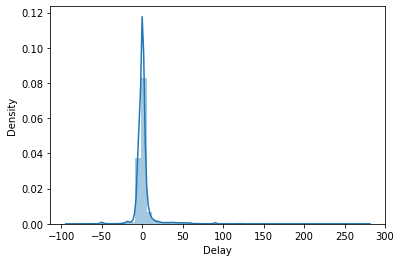

In [21]:
sns.distplot(Y_train)    ###right skewed , hence prediction must be good , outliers present but not significant

<AxesSubplot:xlabel='Delay', ylabel='total_open_amount'>

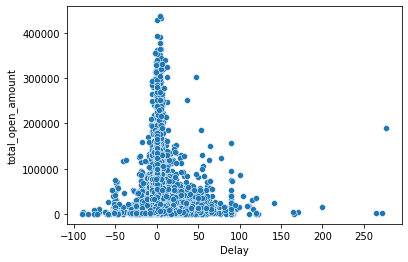

In [22]:
sns.scatterplot(data=X_train.merge(Y_train,on = X_train.index), x="Delay", y="total_open_amount") 
# We can say that generally companies are on time to pay the amount, ontime payments are made irrespective of the amount, 
# a lot of payments are delayed and a few paymentd are made early  

<AxesSubplot:ylabel='cust_number'>

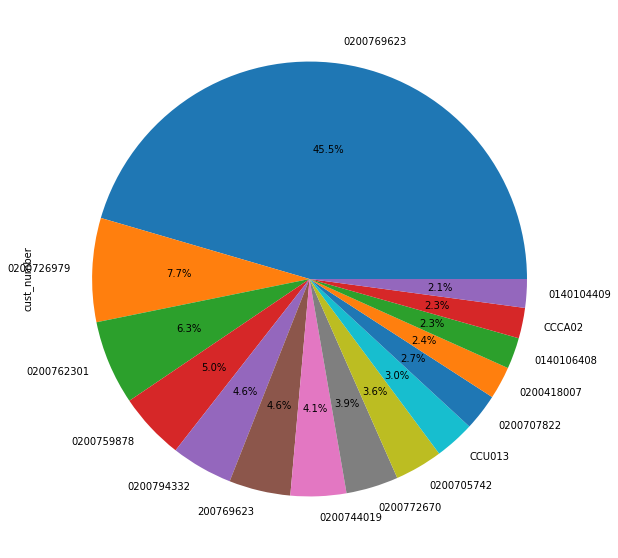

In [23]:
plt.figure(figsize=(10,10))
X_train['cust_number'].value_counts().sort_values(ascending=False)[:15].plot(kind='pie',autopct="%.1f%%")
# signifies how is the order book of the company with which company placing orders the most. we can see ,
#only 15 of the companies take up majority of the order book 

### Feature Engineering

In [24]:
from sklearn.preprocessing import LabelEncoder
business_code_enc = LabelEncoder()                               ##Label Encoding 'business_code'
business_code_enc.fit(X_train['business_code'])
X_train['business_code_enc'] = business_code_enc.transform(X_train['business_code'])

In [25]:
X_validation['business_code_enc'] = business_code_enc.transform(X_validation['business_code']) ## making the same changes in 
X_test_new['business_code_enc'] = business_code_enc.transform(X_test_new['business_code'])     ##validation and test_new set

In [26]:
X_train.drop(['business_code'],axis=1,inplace=True)
X_validation.drop(['business_code'],axis=1,inplace=True)                ##dropping the original column
X_test_new.drop(['business_code'],axis=1,inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
cust_number_enc = LabelEncoder()                               ##Label Encoding 'cust_number'
cust_number_enc.fit(X_train['cust_number'])
X_train['cust_number_enc'] = cust_number_enc.transform(X_train['cust_number'])

In [28]:
X_validation['cust_number_enc'] = cust_number_enc.fit_transform(X_validation['cust_number'])
X_test_new['cust_number_enc'] = cust_number_enc.fit_transform(X_test_new['cust_number'])

In [29]:
X_train.drop(['cust_number'],axis=1,inplace=True)
X_validation.drop(['cust_number'],axis=1,inplace=True)
X_test_new.drop(['cust_number'],axis=1,inplace=True)

In [30]:
from sklearn.preprocessing import LabelEncoder
name_customer_enc = LabelEncoder()                               ##Label Encoding 'name_customer'
cust_number_enc.fit(X_train['name_customer'])
X_train['name_customer_enc'] = cust_number_enc.transform(X_train['name_customer'])

In [31]:
X_validation['name_customer_enc'] = name_customer_enc.fit_transform(X_validation['name_customer'])
X_test_new['name_customer_enc'] = name_customer_enc.fit_transform(X_test_new['name_customer'])

In [32]:
X_train.drop(['name_customer'],axis=1,inplace=True)
X_validation.drop(['name_customer'],axis=1,inplace=True)
X_test_new.drop(['name_customer'],axis=1,inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder
cust_payment_terms_enc = LabelEncoder()                               ##Label Encoding 'cust_payment_terms'
cust_payment_terms_enc.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(X_train['cust_payment_terms'])

In [34]:
X_validation['cust_payment_terms_enc'] = cust_payment_terms_enc.fit_transform(X_validation['cust_payment_terms'])
X_test_new['cust_payment_terms_enc'] = cust_payment_terms_enc.fit_transform(X_test_new['cust_payment_terms'])

In [35]:
X_train.drop(['cust_payment_terms'],axis=1,inplace=True)
X_validation.drop(['cust_payment_terms'],axis=1,inplace=True)
X_test_new.drop(['cust_payment_terms'],axis=1,inplace=True)

In [36]:
from sklearn.preprocessing import LabelEncoder
buisness_year_enc = LabelEncoder()                               ##Label Encoding 'buisness_year'
buisness_year_enc.fit(X_train['buisness_year'])
X_train['buisness_year_enc'] = buisness_year_enc.transform(X_train['buisness_year'])

In [37]:
X_validation['buisness_year_enc'] = buisness_year_enc.fit_transform(X_validation['buisness_year'])
X_test_new['buisness_year_enc'] = buisness_year_enc.fit_transform(X_test_new['buisness_year'])

In [38]:
X_train.drop(['buisness_year'],axis=1,inplace=True)
X_validation.drop(['buisness_year'],axis=1,inplace=True)
X_test_new.drop(['buisness_year'],axis=1,inplace=True)

In [39]:
from sklearn.preprocessing import LabelEncoder
doc_id_enc = LabelEncoder()                               ##Label Encoding 'doc_id'
doc_id_enc.fit(X_train['doc_id'])
X_train['doc_id_enc'] = doc_id_enc.transform(X_train['doc_id'])

In [40]:
X_validation['doc_id_enc'] = doc_id_enc.fit_transform(X_validation['doc_id'])
X_test_new['doc_id_enc'] = doc_id_enc.fit_transform(X_test_new['doc_id'])

In [41]:
X_train.drop(['doc_id'],axis=1,inplace=True)
X_validation.drop(['doc_id'],axis=1,inplace=True)
X_test_new.drop(['doc_id'],axis=1,inplace=True)

In [42]:
X_train["total_open_amount"]=X_train["total_open_amount"].astype(int)
X_validation["total_open_amount"]=X_validation["total_open_amount"].astype(int)
X_test_new["total_open_amount"]=X_test_new["total_open_amount"].astype(int)    ## Changing datatype from float to int

In [43]:
X_train['day_of_posting'] = X_train['posting_date'].dt.day
X_train['month_of_posting'] = X_train['posting_date'].dt.month
X_validation['day_of_posting'] = X_validation['posting_date'].dt.day
X_validation['month_of_posting'] = X_validation['posting_date'].dt.month     #posting_date extraction
X_test_new['day_of_posting'] = X_test_new['posting_date'].dt.day
X_test_new['month_of_posting'] = X_test_new['posting_date'].dt.month

In [44]:
X_train['due_day'] = X_train['due_in_date'].dt.day
X_train['due_month'] = X_train['due_in_date'].dt.month
X_validation['due_day'] = X_validation['due_in_date'].dt.day                #due_in_date extraction
X_validation['due_month'] = X_validation['due_in_date'].dt.month
X_test_new['due_day'] = X_test_new['due_in_date'].dt.day
X_test_new['due_month'] = X_test_new['due_in_date'].dt.month

In [45]:
X_train['baseline_create_day'] = X_train['baseline_create_date'].dt.day
X_validation['baseline_create_day'] = X_validation['baseline_create_date'].dt.day     #baseline_create_date extraction
X_test_new['baseline_create_day'] = X_test_new['baseline_create_date'].dt.day

In [46]:
X_train['day_of_document_create'] = X_train['document_create_date.1'].dt.day        #document_create_date.1 extraction
X_train['month_of_document_create'] = X_train['document_create_date.1'].dt.month
X_validation['day_of_document_create'] = X_validation['document_create_date.1'].dt.day
X_validation['month_of_document_create'] = X_validation['document_create_date.1'].dt.month
X_test_new['day_of_document_create'] = X_test_new['document_create_date.1'].dt.day
X_test_new['month_of_document_create'] = X_test_new['document_create_date.1'].dt.month

In [47]:
X_train.drop(['document_create_date.1','baseline_create_date','posting_date','due_in_date'],axis=1,inplace=True)
X_validation.drop(['document_create_date.1','baseline_create_date','posting_date','due_in_date'],axis=1,inplace=True)
X_test_new.drop(['document_create_date.1','baseline_create_date','posting_date','due_in_date'],axis=1,inplace=True)

### Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

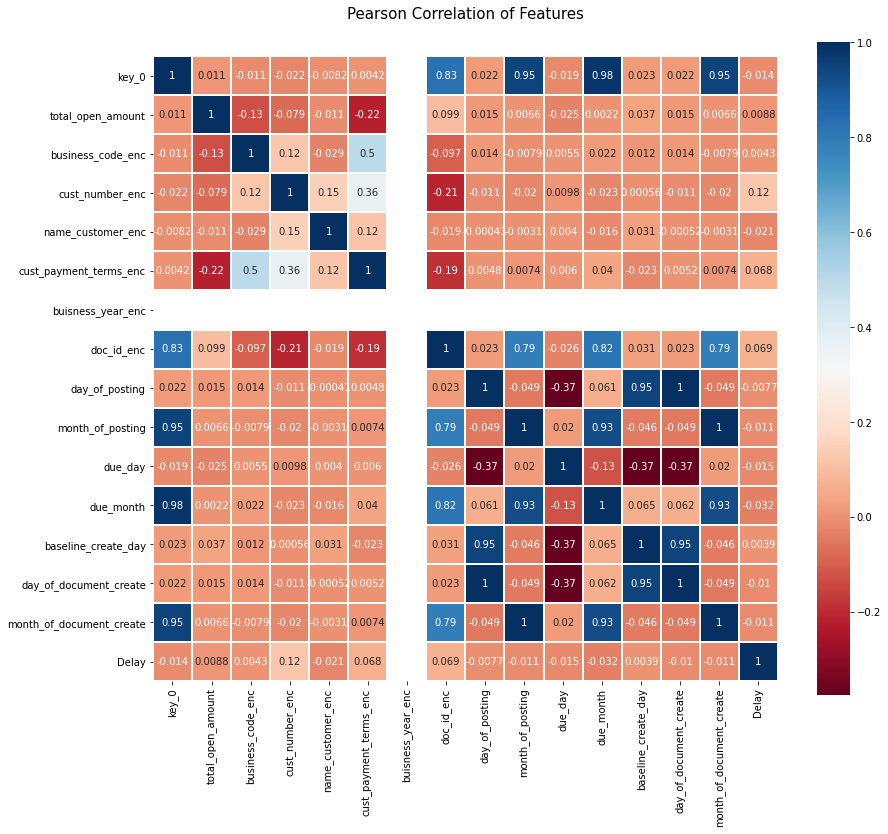

In [48]:
colormap = plt.cm.RdBu                                     #plots the Pearson Covarience of all columns in the dataset           
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(Y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [49]:
X_train.drop(['buisness_year_enc'],axis=1,inplace=True)
X_validation.drop(['buisness_year_enc'],axis=1,inplace=True)       # as from above diagram we see buisness_year_enc is a 
X_test_new.drop(['buisness_year_enc'],axis=1,inplace=True)         # const. col. , we can drop it .

### Modelling (Linear Regression , Decision Tree , XG-Boost , Cat-Boost)

In [50]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, Y_train)
Y_predict = base_model.predict(X_validation)
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_validation, Y_predict, squared=False)     ## Linear Regression

20.9279055457284

In [51]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)
regressor.fit(X_train, Y_train)
Y_predict_2 = regressor.predict(X_validation)
mean_squared_error(Y_validation, Y_predict_2, squared=False)     ## Tree-based model

8.010632777901135

In [52]:
import xgboost as xg
from sklearn.metrics import mean_squared_error
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
xgb_r.fit(X_train,Y_train)
pred = xgb_r.predict(X_test_new)
rmse = nm.sqrt(mean_squared_error(Y_test_new, pred))                     # xgboost based model 
print("RMSE : % f" %(rmse))

[13:58:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  11.424415


In [53]:
import catboost as ctb
c_model = ctb.CatBoostRegressor(iterations=1, loss_function='RMSE')
c_model.fit(X_train, Y_train)                                                   #catboost model
pred = c_model.predict(X_test_new)                                              # gives the best RMSE value
rmse = (nm.sqrt(mean_squared_error(Y_validation, pred)))
print('RMSE: {:.2f}'.format(rmse))

Learning rate set to 0.5
0:	learn: 9.9388430	total: 551ms	remaining: 0us
RMSE: 7.24


### Real_Test Manipulation

In [54]:
real_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0100047527,LIDL corporation,NaN,2020.0,1.930676e+09,2020-03-25,20200325,20200409.0,9313.16,20200325.0,NAA8
8,U001,0200966888,BIRD-I associates,NaN,2020.0,1.930833e+09,2020-04-28,20200428,20200508.0,20000.00,20200428.0,NA10
25,U001,0200779906,BOZZU llc,NaN,2020.0,1.930738e+09,2020-03-31,20200331,20200415.0,23690.10,20200331.0,NAA8
29,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930630e+09,2020-03-11,20200311,20200326.0,16338.16,20200311.0,NAH4
33,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930800e+09,2020-04-19,20200419,20200504.0,13205.81,20200419.0,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49973,U001,0200744019,TARG trust,NaN,2020.0,1.930806e+09,2020-04-20,20200420,20200505.0,18124.75,20200420.0,NAA8
49990,U001,0100031704,DELHAIZE corporation,NaN,2020.0,1.930789e+09,2020-04-17,20200417,20200502.0,57369.71,20200417.0,NAA8
49995,U001,0100031704,DELHAIZE co,NaN,2020.0,1.930776e+09,2020-04-10,20200410,20200425.0,93511.23,20200410.0,NAA8
49997,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930719e+09,2020-03-30,20200330,20200414.0,43420.88,20200330.0,NAH4


In [55]:
real_test.isna().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9692
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date.1       0
due_in_date                  0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
dtype: int64

In [56]:
X_real_test = real_test.drop(['clear_date','buisness_year'],axis=1)

In [57]:
real_test.drop(['clear_date'],axis=1)

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0100047527,LIDL corporation,2020.0,1.930676e+09,2020-03-25,20200325,20200409.0,9313.16,20200325.0,NAA8
8,U001,0200966888,BIRD-I associates,2020.0,1.930833e+09,2020-04-28,20200428,20200508.0,20000.00,20200428.0,NA10
25,U001,0200779906,BOZZU llc,2020.0,1.930738e+09,2020-03-31,20200331,20200415.0,23690.10,20200331.0,NAA8
29,U001,0200769623,WAL-MAR co,2020.0,1.930630e+09,2020-03-11,20200311,20200326.0,16338.16,20200311.0,NAH4
33,U001,0200769623,WAL-MAR foundation,2020.0,1.930800e+09,2020-04-19,20200419,20200504.0,13205.81,20200419.0,NAH4
...,...,...,...,...,...,...,...,...,...,...,...
49973,U001,0200744019,TARG trust,2020.0,1.930806e+09,2020-04-20,20200420,20200505.0,18124.75,20200420.0,NAA8
49990,U001,0100031704,DELHAIZE corporation,2020.0,1.930789e+09,2020-04-17,20200417,20200502.0,57369.71,20200417.0,NAA8
49995,U001,0100031704,DELHAIZE co,2020.0,1.930776e+09,2020-04-10,20200410,20200425.0,93511.23,20200410.0,NAA8
49997,U001,0200769623,WAL-MAR trust,2020.0,1.930719e+09,2020-03-30,20200330,20200414.0,43420.88,20200330.0,NAH4


In [58]:
X_real_test

,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0100047527,LIDL corporation,1.930676e+09,2020-03-25,20200325,20200409.0,9313.16,20200325.0,NAA8
8,U001,0200966888,BIRD-I associates,1.930833e+09,2020-04-28,20200428,20200508.0,20000.00,20200428.0,NA10
25,U001,0200779906,BOZZU llc,1.930738e+09,2020-03-31,20200331,20200415.0,23690.10,20200331.0,NAA8
29,U001,0200769623,WAL-MAR co,1.930630e+09,2020-03-11,20200311,20200326.0,16338.16,20200311.0,NAH4
33,U001,0200769623,WAL-MAR foundation,1.930800e+09,2020-04-19,20200419,20200504.0,13205.81,20200419.0,NAH4
...,...,...,...,...,...,...,...,...,...,...
49973,U001,0200744019,TARG trust,1.930806e+09,2020-04-20,20200420,20200505.0,18124.75,20200420.0,NAA8
49990,U001,0100031704,DELHAIZE corporation,1.930789e+09,2020-04-17,20200417,20200502.0,57369.71,20200417.0,NAA8
49995,U001,0100031704,DELHAIZE co,1.930776e+09,2020-04-10,20200410,20200425.0,93511.23,20200410.0,NAA8
49997,U001,0200769623,WAL-MAR trust,1.930719e+09,2020-03-30,20200330,20200414.0,43420.88,20200330.0,NAH4


In [59]:
X_real_test['due_in_date'] = pd.to_datetime(X_real_test['due_in_date'],format='%Y%m%d')  
X_real_test['baseline_create_date'] = pd.to_datetime(X_real_test['baseline_create_date'],format='%Y%m%d')  
X_real_test['document_create_date.1'] = pd.to_datetime(X_real_test['document_create_date.1'],format='%Y%m%d')  
X_real_test['posting_date'] = pd.to_datetime(X_real_test['posting_date'],format='%Y/%m/%d')
X_real_test.dtypes                            # changing to datetime format

business_code                     object
cust_number                       object
name_customer                     object
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
dtype: object

In [60]:
from sklearn.preprocessing import LabelEncoder
business_code_enc = LabelEncoder()                               ##Label Encoding 'business_code'
business_code_enc.fit(X_real_test['business_code'])
X_real_test['business_code_enc'] = business_code_enc.transform(X_real_test['business_code'])
X_real_test.drop(['business_code'],axis=1,inplace=True)

In [61]:
from sklearn.preprocessing import LabelEncoder
cust_number_enc = LabelEncoder()                               ##Label Encoding 'cust_number'
cust_number_enc.fit(X_real_test['cust_number'])
X_real_test['cust_number_enc'] = cust_number_enc.transform(X_real_test['cust_number'])
X_real_test.drop(['cust_number'],axis=1,inplace=True)

In [62]:
from sklearn.preprocessing import LabelEncoder
name_customer_enc = LabelEncoder()                               ##Label Encoding 'name_customer'
cust_number_enc.fit(X_real_test['name_customer'])
X_real_test['name_customer_enc'] = cust_number_enc.transform(X_real_test['name_customer'])
X_real_test.drop(['name_customer'],axis=1,inplace=True)

In [63]:
from sklearn.preprocessing import LabelEncoder
cust_payment_terms_enc = LabelEncoder()                               ##Label Encoding 'cust_payment_terms'
cust_payment_terms_enc.fit(X_real_test['cust_payment_terms'])
X_real_test['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(X_real_test['cust_payment_terms'])
X_real_test.drop(['cust_payment_terms'],axis=1,inplace=True)

In [64]:
from sklearn.preprocessing import LabelEncoder
doc_id_enc = LabelEncoder()                               ##Label Encoding 'doc_id'
doc_id_enc.fit(X_real_test['doc_id'])
X_real_test['doc_id_enc'] = doc_id_enc.transform(X_real_test['doc_id'])
X_real_test.drop(['doc_id'],axis=1,inplace=True)

In [65]:
X_real_test["total_open_amount"]=X_real_test["total_open_amount"].astype(int)    ## Changing datatype from float to int

In [66]:
   #posting_date extraction
X_real_test['day_of_posting'] = X_real_test['posting_date'].dt.day
X_real_test['month_of_posting'] = X_real_test['posting_date'].dt.month

In [67]:
X_real_test['due_day'] = X_real_test['due_in_date'].dt.day
X_real_test['due_month'] = X_real_test['due_in_date'].dt.month
            #due_in_date extraction

In [68]:
X_real_test['baseline_create_day'] = X_real_test['baseline_create_date'].dt.day
#baseline_create_date extraction

In [69]:
X_real_test['day_of_document_create'] = X_real_test['document_create_date.1'].dt.day      #document_create_date.1 extraction
X_real_test['month_of_document_create'] = X_real_test['document_create_date.1'].dt.month

In [70]:
X_real_test.drop(['document_create_date.1','baseline_create_date','posting_date','due_in_date'],axis=1,inplace=True)

In [71]:
X_train.dtypes

total_open_amount           int32
business_code_enc           int32
cust_number_enc             int32
name_customer_enc           int32
cust_payment_terms_enc      int32
doc_id_enc                  int64
day_of_posting              int64
month_of_posting            int64
due_day                     int64
due_month                   int64
baseline_create_day         int64
day_of_document_create      int64
month_of_document_create    int64
dtype: object

In [72]:
X_real_test.dtypes

total_open_amount           int32
business_code_enc           int32
cust_number_enc             int32
name_customer_enc           int32
cust_payment_terms_enc      int32
doc_id_enc                  int64
day_of_posting              int64
month_of_posting            int64
due_day                     int64
due_month                   int64
baseline_create_day         int64
day_of_document_create      int64
month_of_document_create    int64
dtype: object

### Prediction using the Decision Tree Model 

In [73]:
final_prediction = regressor.predict(X_real_test)

In [74]:
final_prediction = pd.Series(final_prediction,name='Delay')

In [75]:
real_test.reset_index(drop=True,inplace=True)

In [76]:
Result = real_test.merge(final_prediction,on=X_real_test.index)
Result

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,Delay
0,0,U001,0100047527,LIDL corporation,NaN,2020.0,1.930676e+09,2020-03-25,20200325,20200409.0,9313.16,20200325.0,NAA8,0.833166
1,8,U001,0200966888,BIRD-I associates,NaN,2020.0,1.930833e+09,2020-04-28,20200428,20200508.0,20000.00,20200428.0,NA10,5.363940
2,25,U001,0200779906,BOZZU llc,NaN,2020.0,1.930738e+09,2020-03-31,20200331,20200415.0,23690.10,20200331.0,NAA8,0.833166
3,29,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930630e+09,2020-03-11,20200311,20200326.0,16338.16,20200311.0,NAH4,0.833166
4,33,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930800e+09,2020-04-19,20200419,20200504.0,13205.81,20200419.0,NAH4,0.833166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9687,49973,U001,0200744019,TARG trust,NaN,2020.0,1.930806e+09,2020-04-20,20200420,20200505.0,18124.75,20200420.0,NAA8,0.833166
9688,49990,U001,0100031704,DELHAIZE corporation,NaN,2020.0,1.930789e+09,2020-04-17,20200417,20200502.0,57369.71,20200417.0,NAA8,0.833166
9689,49995,U001,0100031704,DELHAIZE co,NaN,2020.0,1.930776e+09,2020-04-10,20200410,20200425.0,93511.23,20200410.0,NAA8,0.833166
9690,49997,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930719e+09,2020-03-30,20200330,20200414.0,43420.88,20200330.0,NAH4,0.833166


In [77]:
Result['due_in_date'] = pd.to_datetime(Result['due_in_date'],format='%Y%m%d')  

In [78]:
Result['Delay'] = pd.to_timedelta(Result["Delay"],unit="days")

In [79]:
Result.Delay.value_counts()

0 days 19:59:45.508876800      8278
5 days 08:44:04.407360          821
8 days 21:26:20.848185600       451
-3 days +18:15:29.553321600     135
-33 days +20:24:00                5
80 days 00:00:00                  2
Name: Delay, dtype: int64

In [80]:
Result.Delay.nunique()

6

In [81]:
Result["clear_date"]= Result["due_in_date"] + Result["Delay"]

In [82]:
Result                           # FINAL PREDICTION OF clear_date

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,Delay
0,0,U001,0100047527,LIDL corporation,2020-04-09 19:59:45.508876800,2020.0,1.930676e+09,2020-03-25,20200325,2020-04-09,9313.16,20200325.0,NAA8,0 days 19:59:45.508876800
1,8,U001,0200966888,BIRD-I associates,2020-05-13 08:44:04.407360000,2020.0,1.930833e+09,2020-04-28,20200428,2020-05-08,20000.00,20200428.0,NA10,5 days 08:44:04.407360
2,25,U001,0200779906,BOZZU llc,2020-04-15 19:59:45.508876800,2020.0,1.930738e+09,2020-03-31,20200331,2020-04-15,23690.10,20200331.0,NAA8,0 days 19:59:45.508876800
3,29,U001,0200769623,WAL-MAR co,2020-03-26 19:59:45.508876800,2020.0,1.930630e+09,2020-03-11,20200311,2020-03-26,16338.16,20200311.0,NAH4,0 days 19:59:45.508876800
4,33,U001,0200769623,WAL-MAR foundation,2020-05-04 19:59:45.508876800,2020.0,1.930800e+09,2020-04-19,20200419,2020-05-04,13205.81,20200419.0,NAH4,0 days 19:59:45.508876800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9687,49973,U001,0200744019,TARG trust,2020-05-05 19:59:45.508876800,2020.0,1.930806e+09,2020-04-20,20200420,2020-05-05,18124.75,20200420.0,NAA8,0 days 19:59:45.508876800
9688,49990,U001,0100031704,DELHAIZE corporation,2020-05-02 19:59:45.508876800,2020.0,1.930789e+09,2020-04-17,20200417,2020-05-02,57369.71,20200417.0,NAA8,0 days 19:59:45.508876800
9689,49995,U001,0100031704,DELHAIZE co,2020-04-25 19:59:45.508876800,2020.0,1.930776e+09,2020-04-10,20200410,2020-04-25,93511.23,20200410.0,NAA8,0 days 19:59:45.508876800
9690,49997,U001,0200769623,WAL-MAR trust,2020-04-14 19:59:45.508876800,2020.0,1.930719e+09,2020-03-30,20200330,2020-04-14,43420.88,20200330.0,NAH4,0 days 19:59:45.508876800


### Adding Buckets to the final result

In [83]:
def Bucketize_Delay(x):
    if(x < 16): return '0-15'
    elif(x>15 or x<31): return '15-30'
    elif(x>30 or x<46): return '30-45'
    else: return '45+'

In [84]:
Result['Delay']=Result['Delay'].dt.days.astype('int16')
Result['Bucketize_Delay'] = Result.Delay.apply(Bucketize_Delay)

In [85]:
Result

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,Delay,Bucketize_Delay
0,0,U001,0100047527,LIDL corporation,2020-04-09 19:59:45.508876800,2020.0,1.930676e+09,2020-03-25,20200325,2020-04-09,9313.16,20200325.0,NAA8,0,0-15
1,8,U001,0200966888,BIRD-I associates,2020-05-13 08:44:04.407360000,2020.0,1.930833e+09,2020-04-28,20200428,2020-05-08,20000.00,20200428.0,NA10,5,0-15
2,25,U001,0200779906,BOZZU llc,2020-04-15 19:59:45.508876800,2020.0,1.930738e+09,2020-03-31,20200331,2020-04-15,23690.10,20200331.0,NAA8,0,0-15
3,29,U001,0200769623,WAL-MAR co,2020-03-26 19:59:45.508876800,2020.0,1.930630e+09,2020-03-11,20200311,2020-03-26,16338.16,20200311.0,NAH4,0,0-15
4,33,U001,0200769623,WAL-MAR foundation,2020-05-04 19:59:45.508876800,2020.0,1.930800e+09,2020-04-19,20200419,2020-05-04,13205.81,20200419.0,NAH4,0,0-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9687,49973,U001,0200744019,TARG trust,2020-05-05 19:59:45.508876800,2020.0,1.930806e+09,2020-04-20,20200420,2020-05-05,18124.75,20200420.0,NAA8,0,0-15
9688,49990,U001,0100031704,DELHAIZE corporation,2020-05-02 19:59:45.508876800,2020.0,1.930789e+09,2020-04-17,20200417,2020-05-02,57369.71,20200417.0,NAA8,0,0-15
9689,49995,U001,0100031704,DELHAIZE co,2020-04-25 19:59:45.508876800,2020.0,1.930776e+09,2020-04-10,20200410,2020-04-25,93511.23,20200410.0,NAA8,0,0-15
9690,49997,U001,0200769623,WAL-MAR trust,2020-04-14 19:59:45.508876800,2020.0,1.930719e+09,2020-03-30,20200330,2020-04-14,43420.88,20200330.0,NAH4,0,0-15
